In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime

In [2]:
data = pd.read_csv('Tesla.csv - Tesla.csv.csv')

In [3]:
data.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [4]:
dates = pd.to_datetime(data['Date'])

In [5]:
Y = data['Close']

In [6]:
X = data[['Open', 'High', 'Low', 'Volume']]

In [7]:
X.head()

,Open,High,Low,Volume
0,19.000000,25.00,17.540001,18766300
1,25.790001,30.42,23.299999,17187100
2,25.000000,25.92,20.270000,8218800
3,23.000000,23.10,18.709999,5139800
4,20.000000,20.00,15.830000,6866900


In [8]:
Y.head()

0    23.889999
1    23.830000
2    21.959999
3    19.200001
4    16.110001
Name: Close, dtype: float64

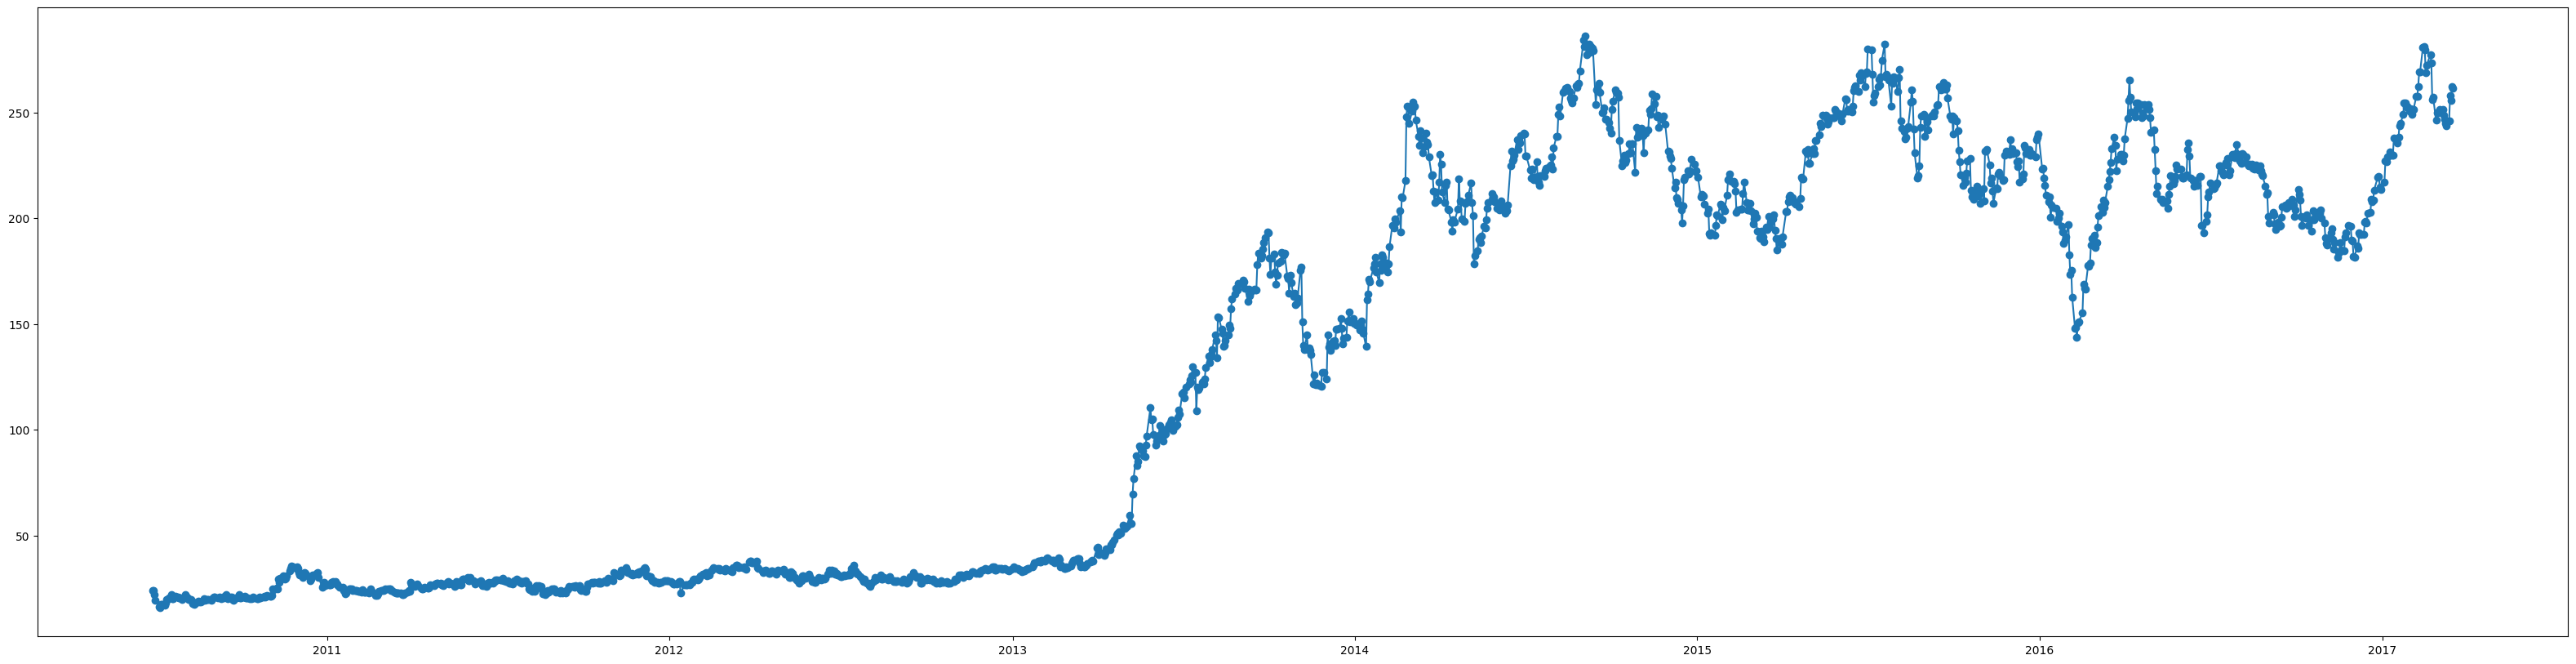

In [9]:
plt.figure(figsize=(40,10))
plt.plot(dates, Y, marker='o', linestyle='-')

# Data Splitting

In [10]:
train_size = int(len(data)*0.80)

In [11]:
X_train, X_test, Y_train, Y_test, train_date, test_date = X[:train_size], X[train_size:], Y[:train_size], Y[train_size:], dates[:train_size], dates[train_size:]

In [12]:
print(f"X_train : {X_train.shape}\nX_test : {X_test.shape}\nY_train : {Y_train.shape}\nY_test : {Y_test.shape}\ntrain_date : {train_date.shape}\ntest_date : {test_date.shape}\n")

X_train : (1353, 4)
X_test : (339, 4)
Y_train : (1353,)
Y_test : (339,)
train_date : (1353,)
test_date : (339,)



# Simple Moving Average

In [13]:
y_pred_sma = Y_test.rolling(10).mean() # window_size = 10

Text(0.5, 1.0, 'Simple Moving Average')

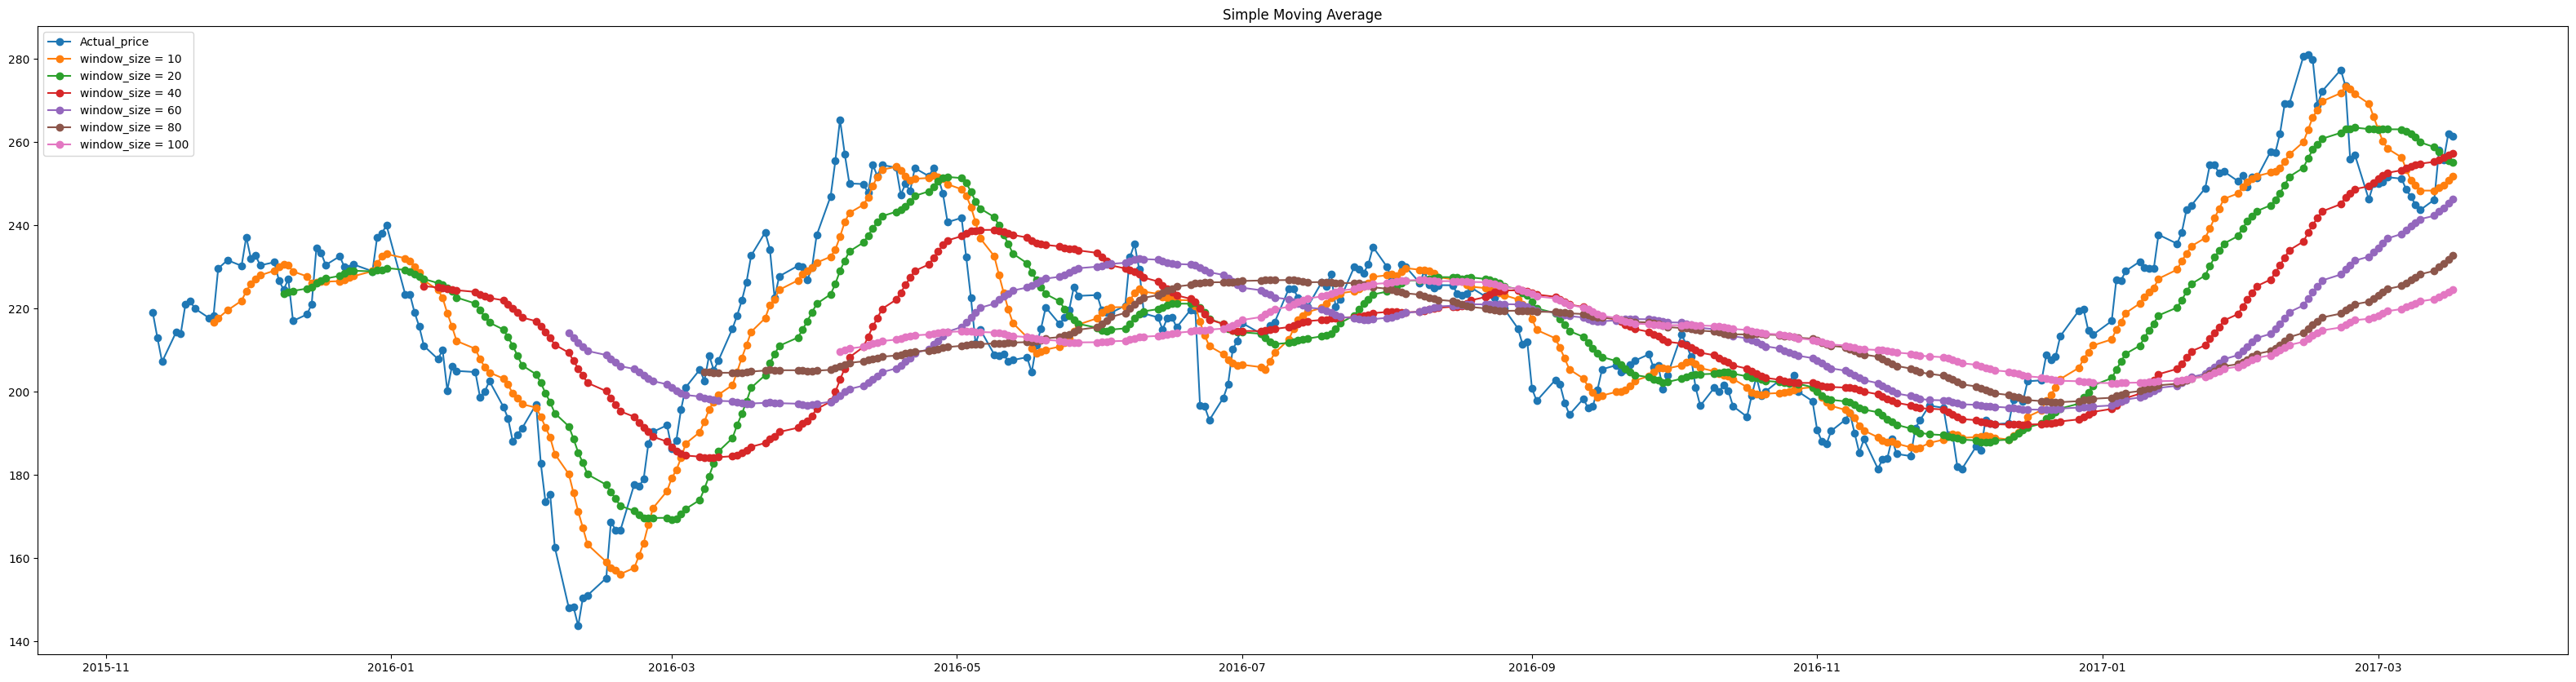

In [14]:
plt.figure(figsize=(40,10))
plt.plot(test_date, Y_test, marker='o', linestyle='-', label='Actual_price')
plt.plot(test_date, y_pred_sma, marker='o', linestyle='-', label='window_size = 10')
plt.plot(test_date, Y_test.rolling(20).mean(), marker='o', linestyle='-', label='window_size = 20') # window_size = 20
plt.plot(test_date, Y_test.rolling(40).mean(), marker='o', linestyle='-', label='window_size = 40') # window_size = 40
plt.plot(test_date, Y_test.rolling(60).mean(), marker='o', linestyle='-', label='window_size = 60') # window_size = 60
plt.plot(test_date, Y_test.rolling(80).mean(), marker='o', linestyle='-', label='window_size = 80') # window_size = 80
plt.plot(test_date, Y_test.rolling(100).mean(), marker='o', linestyle='-', label='window_size = 100') # window_size = 100
plt.legend()
plt.title('Simple Moving Average')

# Exponential Moving Average

Text(0.5, 1.0, 'Exponential Moving Average')

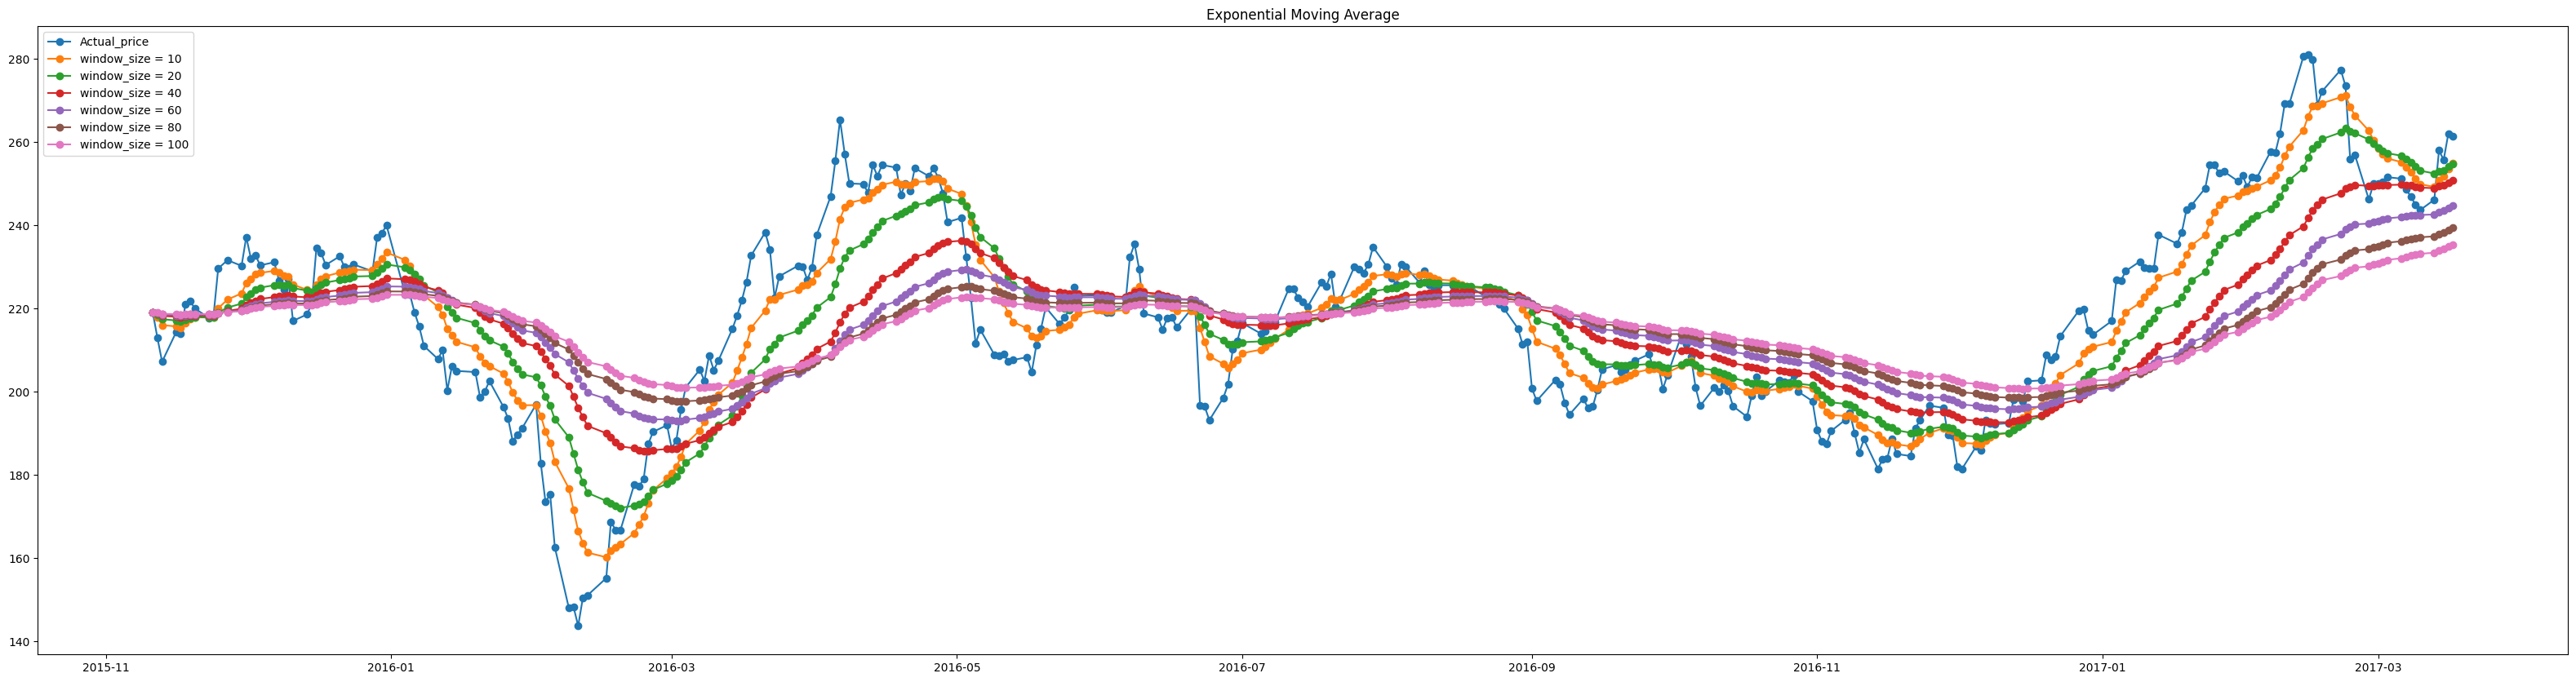

In [15]:
plt.figure(figsize=(40,10))
plt.plot(test_date, Y_test, marker='o', linestyle='-', label='Actual_price')
plt.plot(test_date, Y_test.ewm(span = 10, adjust=False).mean(), marker='o', linestyle='-', label='window_size = 10') # window_size = 10
plt.plot(test_date, Y_test.ewm(span = 20, adjust=False).mean(), marker='o', linestyle='-', label='window_size = 20') # window_size = 20
plt.plot(test_date, Y_test.ewm(span = 40, adjust=False).mean(), marker='o', linestyle='-', label='window_size = 40') # window_size = 40
plt.plot(test_date, Y_test.ewm(span = 60, adjust=False).mean(), marker='o', linestyle='-', label='window_size = 60') # window_size = 60
plt.plot(test_date, Y_test.ewm(span = 80, adjust=False).mean(), marker='o', linestyle='-', label='window_size = 80') # window_size = 80
plt.plot(test_date, Y_test.ewm(span = 100, adjust=False).mean(), marker='o', linestyle='-', label='window_size = 100') # window_size = 100
plt.legend()
plt.title('Exponential Moving Average')

# Performance check for SMA and EMA

In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# SMA
print("____SMA____\n-->For window_size = 10")
print(f"mean absolute error : {mean_absolute_error(Y_test[10:], Y_test.rolling(10).mean()[10:])}")
print(f"mean Squared error : {mean_squared_error(Y_test[10:], Y_test.rolling(10).mean()[10:])}")
print(f"R2 Score : {r2_score(Y_test[10:], Y_test.rolling(10).mean()[10:])}")

print("\n-->For window_size = 20")
print(f"mean absolute error : {mean_absolute_error(Y_test[20:], Y_test.rolling(20).mean()[20:])}")
print(f"mean Squared error : {mean_squared_error(Y_test[20:], Y_test.rolling(20).mean()[20:])}")
print(f"R2 Score : {r2_score(Y_test[20:], Y_test.rolling(20).mean()[20:])}")

# EMA
print("\n_____EMA_____\n-->For window_size = 10")
print(f"mean absolute error : {mean_absolute_error(Y_test, Y_test.ewm(span = 10, adjust=False).mean())}")
print(f"mean Squared error : {mean_squared_error(Y_test, Y_test.ewm(span = 10, adjust=False).mean())}")
print(f"R2 Score : {r2_score(Y_test, Y_test.ewm(span = 10, adjust=False).mean())}")

print("\n-->For window_size = 20")
print(f"mean absolute error : {mean_absolute_error(Y_test, Y_test.ewm(span = 20, adjust=False).mean())}")
print(f"mean Squared error : {mean_squared_error(Y_test, Y_test.ewm(span = 20, adjust=False).mean())}")
print(f"R2 Score : {r2_score(Y_test, Y_test.ewm(span = 20, adjust=False).mean())}")

____SMA____
-->For window_size = 10
mean absolute error : 7.530209826139817
mean Squared error : 91.38180387845188
R2 Score : 0.8533965816262883

-->For window_size = 20
mean absolute error : 11.869073798432604
mean Squared error : 220.91251628535787
R2 Score : 0.6533623748129909

_____EMA_____
-->For window_size = 10
mean absolute error : 6.322452658196386
mean Squared error : 64.86947040633781
R2 Score : 0.8928703298630015

-->For window_size = 20
mean absolute error : 9.650020236064321
mean Squared error : 151.6201444875467
R2 Score : 0.7496046142610722


# Linear Regression

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
lr = LinearRegression()

In [19]:
model = lr.fit(X_train, Y_train)

In [20]:
y_pred = model.predict(X_test)

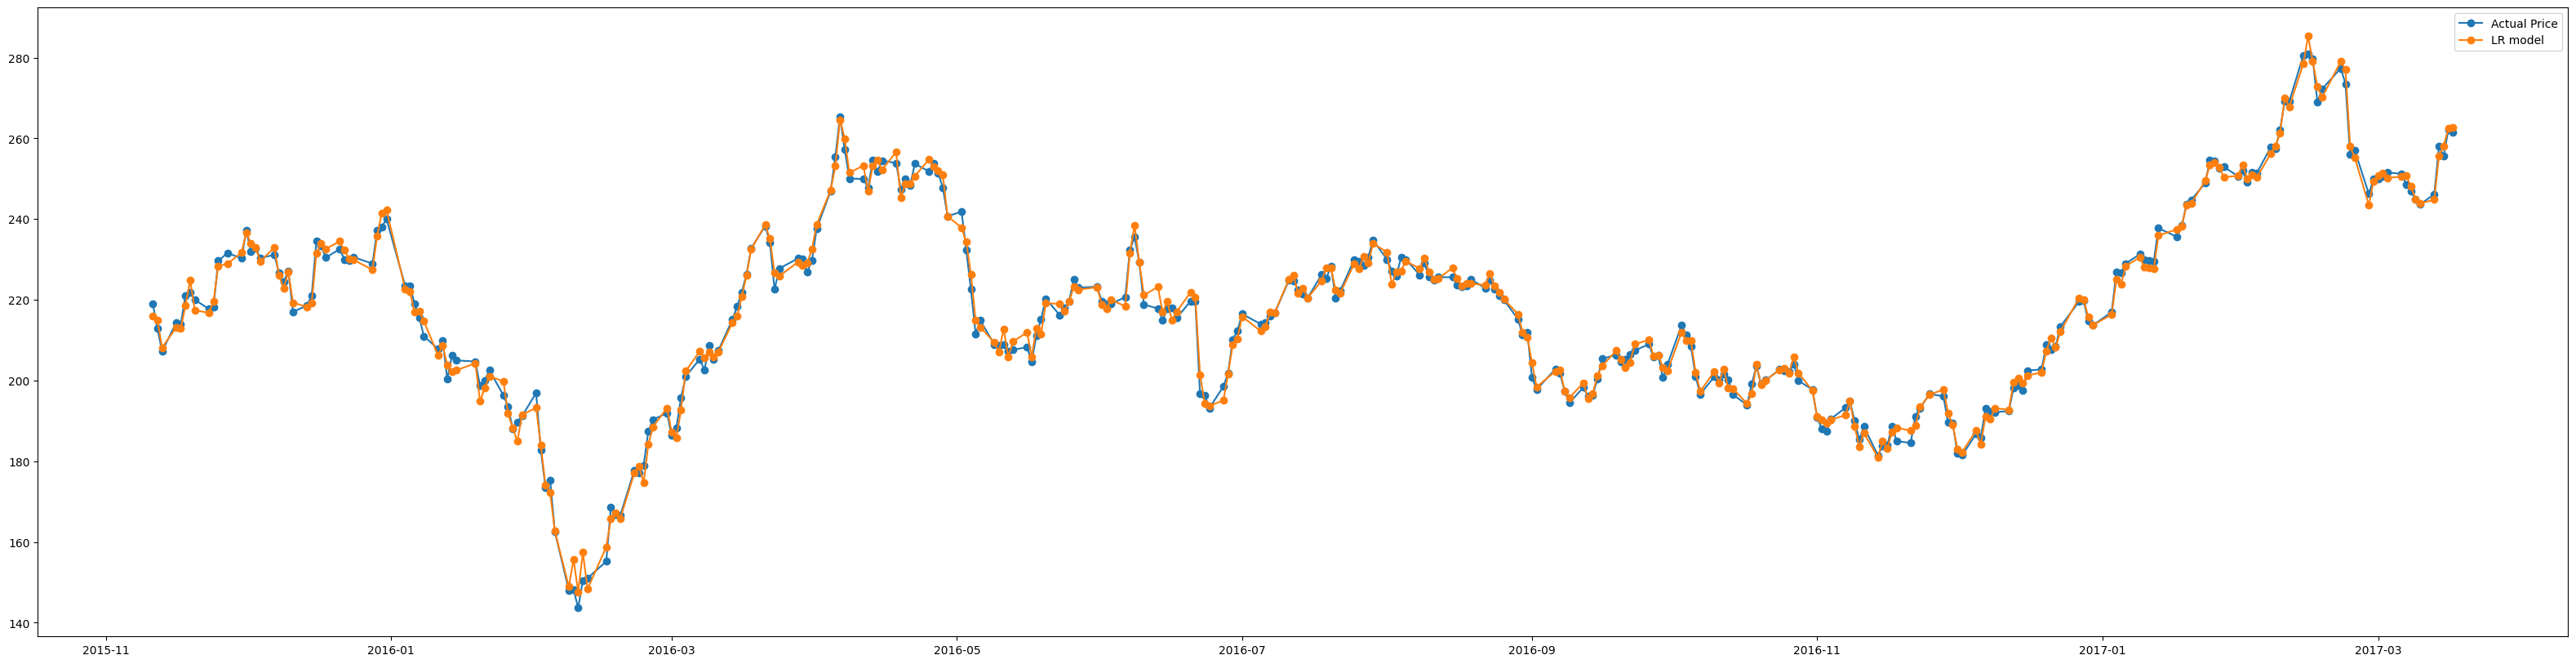

In [21]:
plt.figure(figsize=(40,10))
plt.plot(test_date, Y_test, marker='o', linestyle='-', label='Actual Price')
plt.plot(test_date, y_pred, marker='o', linestyle='-', label='LR model')
plt.legend()


In [22]:
print(f"mean absolute error : {mean_absolute_error(Y_test, y_pred)}")
print(f"mean Squared error : {mean_squared_error(Y_test, y_pred)}")
print(f"R2 Score : {r2_score(Y_test, y_pred)}")

mean absolute error : 1.5521281347545748
mean Squared error : 3.7245651038276644
R2 Score : 0.9938490105055976
